# **Install & Load Package**

In [2]:
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install eli5
!pip install lime

     |████████████████████████████████| 1.0 MB 7.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for dalex: filename=dalex-1.4.1-py3-none-any.whl size=1042860 sha256=ecfaaf1b1c5fdd2571759c2f269f6a3d7517588f081fb321a0302e95c585ddeb
  Stored in directory: /root/.cache/pip/wheels/8c/8e/1b/95d59374d386e8e495aed6cbab4c4b6d72be73993a424c5e12
Successfully built dalex
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 564 kB 8.4 MB/s 
     |████████████████████████████████| 106 kB 7.3 MB/s 
     |████████████████████████████████| 275 kB 8.6 MB/s 
  Creat

In [3]:
# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt
# import seaborn for data visualization
import seaborn as sns
# import scipy for certain statistical function
from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import multi-layer perceptron
from sklearn.neural_network import MLPClassifier
# load logistic regression model
from sklearn.linear_model import LogisticRegression
# load linear regression model
from sklearn.linear_model import LinearRegression

# import xgboost classifier
from xgboost import XGBClassifier

# import dalex to explain complex model
import dalex as dx

# load scikit-plot modules
import scikitplot as skplt

# load shap package for shap explanation
import shap

# load eli5
import eli5

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer 


# load tree visualization
from sklearn.tree import plot_tree, export_text

# load statsmodel module 
import statsmodels.api as sm
import statsmodels.formula.api as smf

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


# **Load Dataset**

In [4]:
# load asurance dataset
asurance_data = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/car_insurance_fraud_dataset/insuranceFraud.csv")

In [5]:
# check the first 5 data asurance_data
asurance_data.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


# **Data Inspection**

In [6]:
# check asurance_data structure and its types
asurance_data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
# check data dimension
asurance_data.shape

(1000, 39)

In [8]:
# check null values inside dataset
asurance_data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [9]:
asurance_data.isnull().values.any()

False

In [10]:
asurance_data.isna().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                 False
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [11]:
asurance_data['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [12]:
asurance_data['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [13]:
#asurance_data = asurance_data.replace['police_report_available']='?', value='NO', inplace=True
dictpolice = {"police_report_available": {"?": 'NO'}}
dictcollution = {"collision_type": {"?": 'Rear Collision'}}
dictproperty = {"property_damage": {"?": 'NO'}}
asurance_data = asurance_data.replace(dictpolice)
asurance_data = asurance_data.replace(dictcollution)
asurance_data = asurance_data.replace(dictproperty)
asurance_data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


# **Data Inspection**

In [14]:
asurance_data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [15]:
# check data dimension
asurance_data.shape

(1000, 39)

In [16]:
# check null values inside dataset
asurance_data.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [17]:
# removes row with na values
asurance_data = asurance_data.dropna()

In [18]:
# check dimension and null values inside dataset
print("Dimension of data: {}".format(asurance_data.shape))
print("Number of null values:")
asurance_data.isna().sum()

Dimension of data: (1000, 39)
Number of null values:


months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [19]:
asurance_data['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [20]:
asurance_data['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

In [21]:
asurance_data['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [22]:
asurance_data[asurance_data['property_damage']=='?'].sum()

months_as_customer             0.0
age                            0.0
policy_number                  0.0
policy_bind_date               0.0
policy_state                   0.0
policy_csl                     0.0
policy_deductable              0.0
policy_annual_premium          0.0
umbrella_limit                 0.0
insured_zip                    0.0
insured_sex                    0.0
insured_education_level        0.0
insured_occupation             0.0
insured_hobbies                0.0
insured_relationship           0.0
capital-gains                  0.0
capital-loss                   0.0
incident_date                  0.0
incident_type                  0.0
collision_type                 0.0
incident_severity              0.0
authorities_contacted          0.0
incident_state                 0.0
incident_city                  0.0
incident_location              0.0
incident_hour_of_the_day       0.0
number_of_vehicles_involved    0.0
property_damage                0.0
bodily_injuries     

In [23]:
asurance_data['property_damage'].unique()

array(['YES', 'NO'], dtype=object)

In [24]:
asurance_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [25]:
asurance_data.sample(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
388,208,36,467106,10/8/1995,OH,100/300,2000,1209.41,5000000,476185,...,1,NO,62810,11420,11420,39970,Nissan,Ultima,1999,N
320,233,37,876714,11/3/1991,IL,100/300,2000,1603.42,0,616637,...,2,YES,80520,13420,6710,60390,Toyota,Corolla,2005,N
960,194,34,573572,6/16/1991,IL,100/300,500,1429.96,0,463307,...,2,YES,57200,11440,5720,40040,Toyota,Camry,2005,N
251,111,27,532330,9/22/2002,OH,250/500,500,1459.97,5000000,441783,...,2,NO,80850,7350,14700,58800,Ford,F150,2011,Y
5,256,39,104594,10/12/2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y


In [26]:
asurance_data.reset_index()

,index,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,3,38,941851,7/16/1991,OH,500/1000,1000,1310.80,0,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,996,285,41,186934,1/5/2014,IL,100/300,1000,1436.79,0,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,997,130,34,918516,2/17/2003,OH,250/500,500,1383.49,3000000,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,998,458,62,533940,11/18/2011,IL,500/1000,2000,1356.92,5000000,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [27]:
# 1 : Fraud Data
# 0 : No Fraud Data
# data.drop(['DOMISILI','KODE_DONATUR','STATUS'], axis=1, inplace=True)
dictfraud = {"fraud_reported": {"N": 0, "Y": 1}}
asurance_data = asurance_data.replace(dictfraud)

In [28]:
# typecasting date data to datetime
asurance_data['policy_bind_date']= asurance_data.policy_bind_date.astype('datetime64')
# check data
asurance_data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


# **Simple EDA**

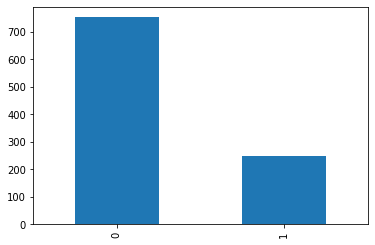

In [29]:
# check target class distribution
asurance_data['fraud_reported'].value_counts().plot(kind = 'bar')

In [30]:
# count 'fraud_reported' class frequencies
asurance_data['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

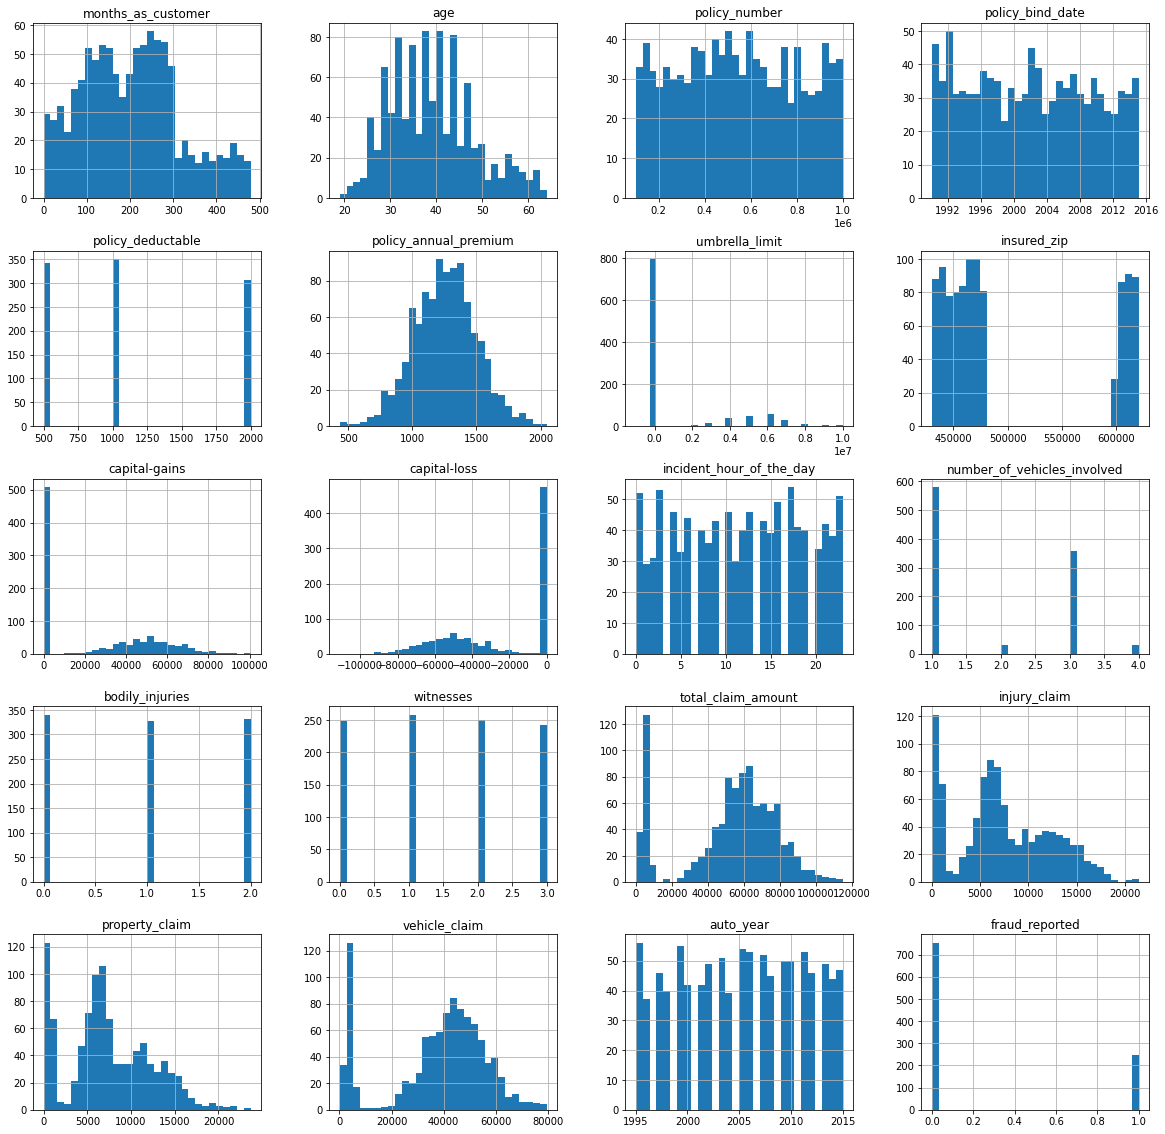

In [31]:
# check numerical data distribution
asurance_data.hist(bins=30, figsize = (20, 20));

# **Check Data Correlation or Multikolinarity**

In [32]:
asurance_data.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,-0.029443
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,0.019368
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,-0.019173
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,-0.014863
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,0.004316


Variable yang memiliki multicolinarity: Variable months_as_customer berkolerasi dengan variable **age** dan memiliki data corelasi lebih rendah terhadap variable independent (0.01). total_claim_amount dengan **injury_claim** dan memiliki corr lebih rendah terhadap variable independen. **Property_claim** (0.13) berkolerasi dengan total_claim_amount (0.16) dan yang memiliki korelasi lebih rendah terhadap variable independent adalah **property claim **.  vehicle_claim (0.17) berkolerasi dengan **total_claim_amount** (0.16) dan yang memiliki corr terhadap variable independen yang lebih kecil. vehicle_claim (0.17) berkolerasi dengan **injury_claim** (0.09) . vehicle_claim (0.17) dengan **Property_claim** (0.13) 

In [33]:
# drop certain columns
asurance_data_ = asurance_data.drop(['policy_bind_date'], axis = 1)

In [34]:
# cretate predictor variables as X
X = asurance_data_.drop(['fraud_reported'], axis = 1)
# create target data as y
y = asurance_data_['fraud_reported']

In [35]:
# pull numerical column
var_name = X.select_dtypes(include = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])

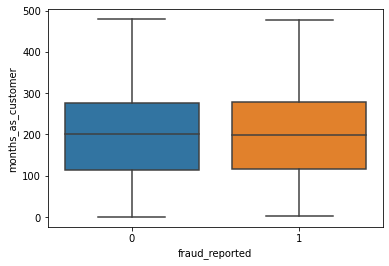

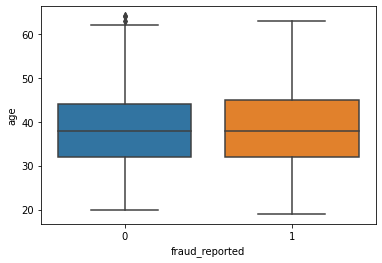

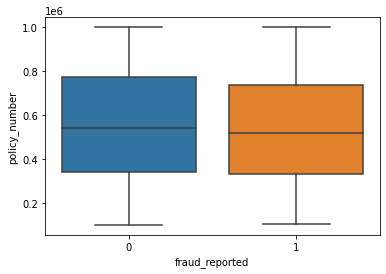

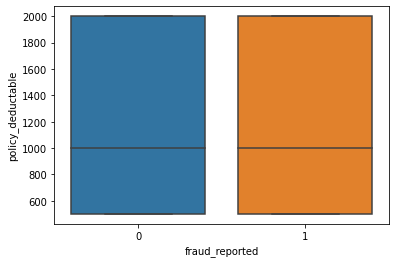

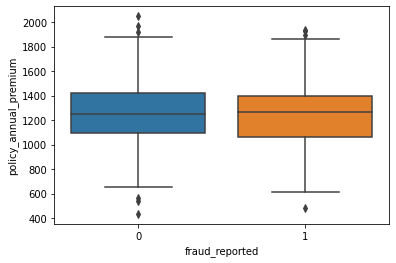

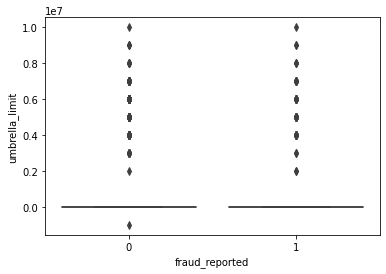

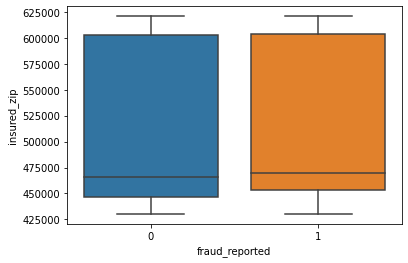

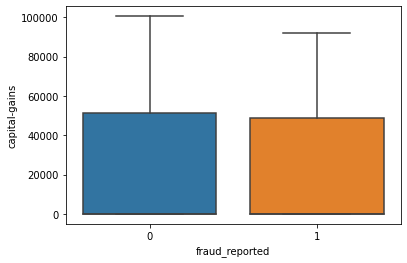

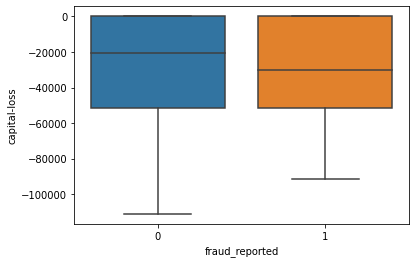

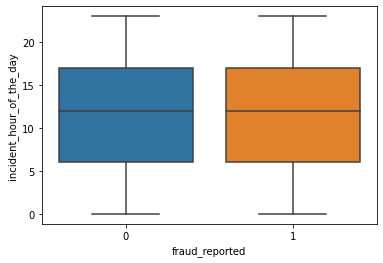

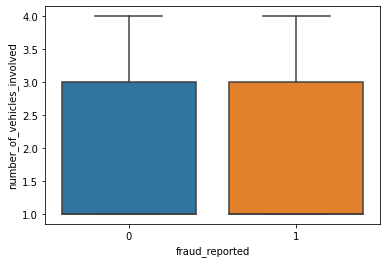

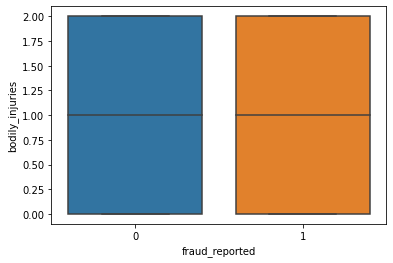

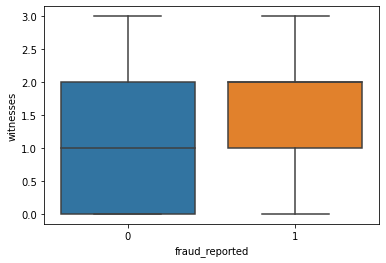

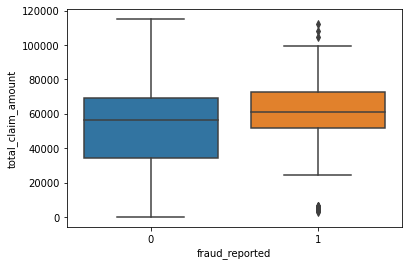

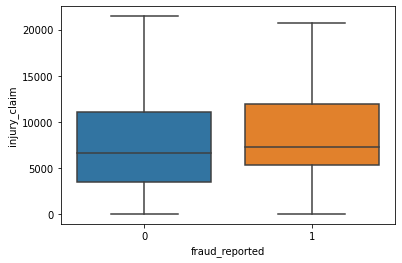

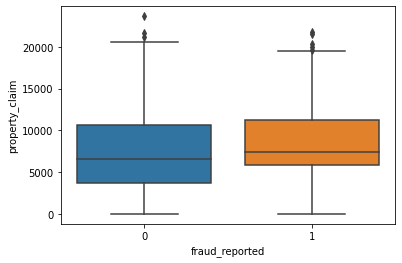

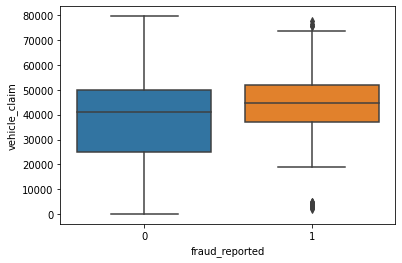

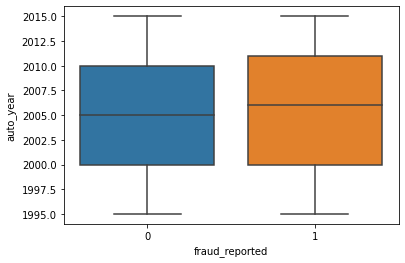

In [36]:
# plot box plot
for col_names in var_name:
  plt.figure()
  sns.boxplot(x = y, y = X[col_names]);

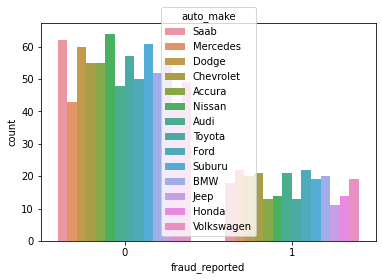

In [37]:
# visualize correlation between 'retained' and other category variables
sns.countplot(
    data=pd.concat([X, y], axis = 1),
    x = "fraud_reported",
    hue = "auto_make"
);

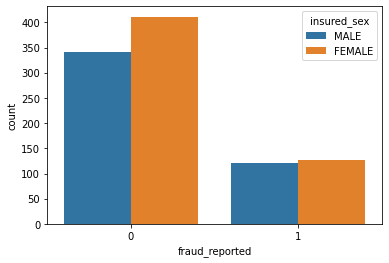

In [38]:
# visualize correlation between 'retained' and other category variables
sns.countplot(
    data=pd.concat([X, y], axis = 1),
    x = "fraud_reported",
    hue = "insured_sex"
);

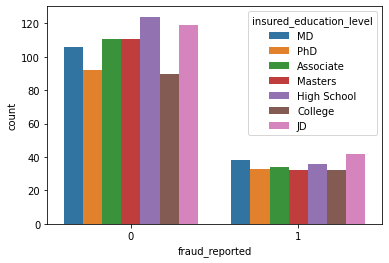

In [39]:
# visualize correlation between 'retained' and other category variables
sns.countplot(
    data=pd.concat([X, y], axis = 1),
    x = "fraud_reported",
    hue = "insured_education_level"
);

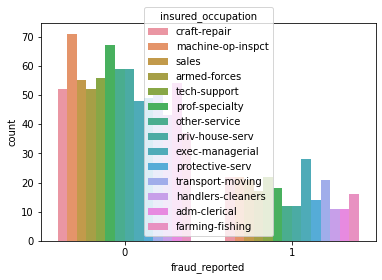

In [40]:
# visualize correlation between 'retained' and other category variables
sns.countplot(
    data=pd.concat([X, y], axis = 1),
    x = "fraud_reported",
    hue = "insured_occupation"
);

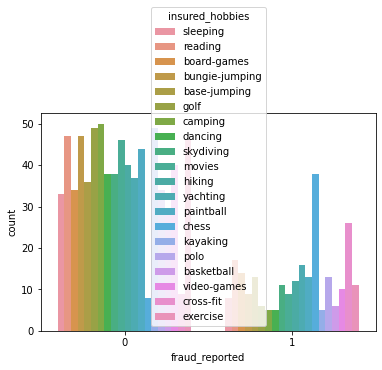

In [41]:
# visualize correlation between 'retained' and other category variables
sns.countplot(
    data=pd.concat([X, y], axis = 1),
    x = "fraud_reported",
    hue = "insured_hobbies"
);

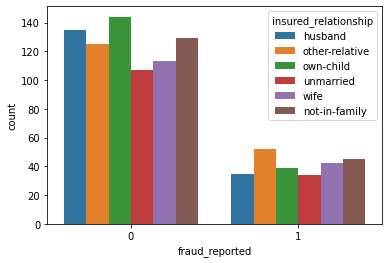

In [42]:
# visualize correlation between 'retained' and other category variables
sns.countplot(
    data=pd.concat([X, y], axis = 1),
    x = "fraud_reported",
    hue = "insured_relationship"
);

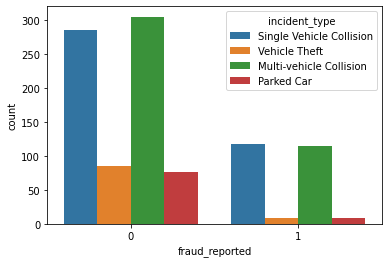

In [43]:
# visualize correlation between 'retained' and other category variables
sns.countplot(
    data=pd.concat([X, y], axis = 1),
    x = "fraud_reported",
    hue = "incident_type"
);

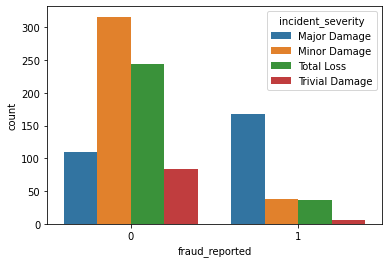

In [44]:
# visualize correlation between 'retained' and other category variables
sns.countplot(
    data=pd.concat([X, y], axis = 1),
    x = "fraud_reported",
    hue = "incident_severity"
);

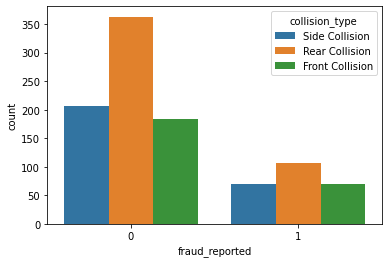

In [45]:
# visualize correlation between 'retained' and other category variables
sns.countplot(
    data=pd.concat([X, y], axis = 1),
    x = "fraud_reported",
    hue = "collision_type"
);

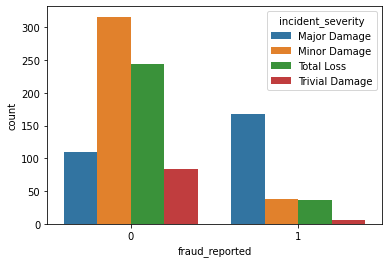

In [46]:
# visualize correlation between 'retained' and other category variables
sns.countplot(
    data=pd.concat([X, y], axis = 1),
    x = "fraud_reported",
    hue = "incident_severity"
);

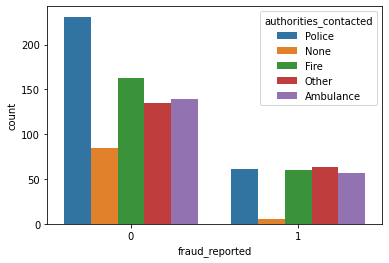

In [47]:
# visualize correlation between 'retained' and other category variables
sns.countplot(
    data=pd.concat([X, y], axis = 1),
    x = "fraud_reported",
    hue = "authorities_contacted"
);

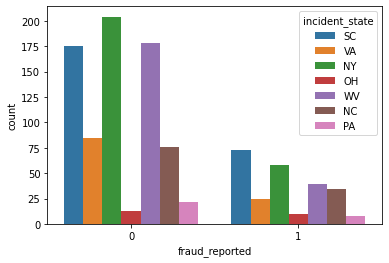

In [48]:
# visualize correlation between 'retained' and other category variables
sns.countplot(
    data=pd.concat([X, y], axis = 1),
    x = "fraud_reported",
    hue = "incident_state"
);

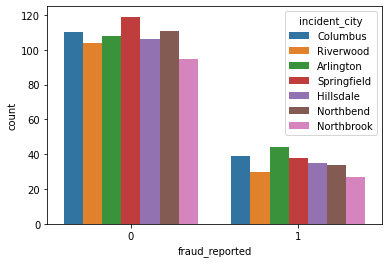

In [49]:
# visualize correlation between 'retained' and other category variables
sns.countplot(
    data=pd.concat([X, y], axis = 1),
    x = "fraud_reported",
    hue = "incident_city"
);

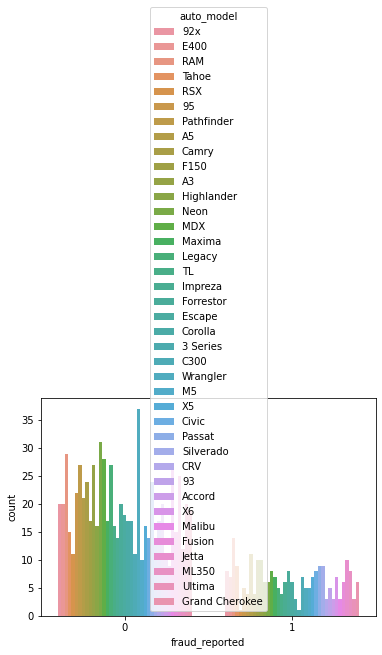

In [50]:
# visualize correlation between 'retained' and other category variables
sns.countplot(
    data=pd.concat([X, y], axis = 1),
    x = "fraud_reported",
    hue = "auto_model"
);

berdasarkan hasil intrepretasi data visual korelasi data categorical bahwa variabel berikut tidak berpengaruh signifikan terhadap variabel indpendet :
insured_sex
insured_occupation
insured_hobbies
insured_relationship
incident_type
collision_type
authorities_contacted
incident_state
auto_model

In [51]:
X

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,1,2,YES,71610,6510,13020,52080,Saab,92x,2004
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,0,NO,5070,780,780,3510,Mercedes,E400,2007
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,0,1,NO,6500,1300,650,4550,Accura,RSX,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,0,1,NO,87200,17440,8720,61040,Honda,Accord,2006
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,2,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,0,1,YES,46980,5220,5220,36540,Audi,A5,1998


In [52]:
# drop certain column on train data
X = X.drop(['age', 'injury_claim', 'property_claim',
                  'total_claim_amount', 'insured_sex', 'insured_occupation', 
                  'insured_hobbies', 'insured_relationship', 'incident_type',
                  'collision_type', 'authorities_contacted',
                  'incident_state', 'auto_model', 'auto_make', 'auto_year' ,
            'insured_zip', 'policy_state'], axis = 1)

# check its first 5 rows
X.head()

,months_as_customer,policy_number,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,capital-gains,capital-loss,incident_date,incident_severity,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,vehicle_claim
0,328,521585,250/500,1000,1406.91,0,MD,53300,0,1/25/2015,Major Damage,Columbus,9935 4th Drive,5,1,YES,1,2,YES,52080
1,228,342868,250/500,2000,1197.22,5000000,MD,0,0,1/21/2015,Minor Damage,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,3510
2,134,687698,100/300,2000,1413.14,5000000,PhD,35100,0,2/22/2015,Minor Damage,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,23100
3,256,227811,250/500,2000,1415.74,6000000,PhD,48900,-62400,1/10/2015,Major Damage,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,50720
4,228,367455,500/1000,1000,1583.91,6000000,Associate,66000,-46000,2/17/2015,Minor Damage,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,4550


In [53]:
cats = list(X.select_dtypes('object').columns)
nums = list(X.select_dtypes('number').columns)

In [54]:
cats

['policy_csl',
 'insured_education_level',
 'incident_date',
 'incident_severity',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available']

In [55]:
nums

['months_as_customer',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'vehicle_claim']

In [56]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [57]:
ordinals = pd.DataFrame(encoder.fit_transform(X[cats]), columns = cats)

In [58]:
ordinals = pd.DataFrame(encoder.fit_transform(X[cats]), columns = cats)

In [59]:
X[cats] = ordinals

In [60]:
X

,months_as_customer,policy_number,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,capital-gains,capital-loss,incident_date,incident_severity,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,vehicle_claim
0,328,521585,1.0,1000,1406.91,0,4.0,53300,0,17.0,0.0,1.0,996.0,5,1,1.0,1,2,1.0,52080
1,228,342868,1.0,2000,1197.22,5000000,4.0,0,0,13.0,1.0,5.0,628.0,8,1,0.0,0,0,0.0,3510
2,134,687698,0.0,2000,1413.14,5000000,6.0,35100,0,45.0,1.0,1.0,685.0,7,3,0.0,2,3,0.0,23100
3,256,227811,1.0,2000,1415.74,6000000,6.0,48900,-62400,1.0,0.0,0.0,669.0,5,1,0.0,1,2,0.0,50720
4,228,367455,2.0,1000,1583.91,6000000,0.0,66000,-46000,39.0,1.0,0.0,220.0,20,1,0.0,0,1,0.0,4550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,941851,2.0,1000,1310.80,0,5.0,0,0,45.0,1.0,4.0,561.0,20,1,1.0,0,1,0.0,61040
996,285,186934,0.0,1000,1436.79,0,6.0,70900,0,16.0,0.0,3.0,227.0,23,1,1.0,2,3,0.0,72320
997,130,918516,1.0,500,1383.49,3000000,5.0,35100,0,15.0,1.0,0.0,746.0,4,3,0.0,2,3,1.0,52500
998,458,533940,2.0,2000,1356.92,5000000,0.0,0,0,49.0,0.0,0.0,569.0,2,1,0.0,0,1,1.0,36540


NORMALIZATION

In [61]:
X = pd.get_dummies(X)

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_transform = scaler.fit_transform(X)

In [63]:
X_transform = pd.DataFrame(X_transform,columns = X.columns)

In [64]:
X_transform

,months_as_customer,policy_number,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,capital-gains,capital-loss,incident_date,incident_severity,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,vehicle_claim
0,0.684760,0.468247,0.5,0.333333,0.603112,0.090909,0.666667,0.530348,1.000000,0.288136,0.000000,0.166667,0.996997,0.217391,0.000000,1.0,0.5,0.666667,1.0,0.654296
1,0.475992,0.269370,0.5,1.000000,0.473214,0.545455,0.666667,0.000000,1.000000,0.220339,0.333333,0.833333,0.628629,0.347826,0.000000,0.0,0.0,0.000000,0.0,0.043276
2,0.279749,0.653098,0.0,1.000000,0.606972,0.545455,1.000000,0.349254,1.000000,0.762712,0.333333,0.166667,0.685686,0.304348,0.666667,0.0,1.0,1.000000,0.0,0.289722
3,0.534447,0.141334,0.5,1.000000,0.608582,0.636364,1.000000,0.486567,0.438344,0.016949,0.000000,0.000000,0.669670,0.217391,0.000000,0.0,0.5,0.666667,0.0,0.637187
4,0.475992,0.296730,1.0,0.333333,0.712760,0.636364,0.000000,0.656716,0.585959,0.661017,0.333333,0.000000,0.220220,0.869565,0.000000,0.0,0.0,0.333333,0.0,0.056359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.006263,0.935920,1.0,0.333333,0.543574,0.090909,0.833333,0.000000,1.000000,0.762712,0.333333,0.666667,0.561562,0.869565,0.000000,1.0,0.0,0.333333,0.0,0.767015
996,0.594990,0.095846,0.0,0.333333,0.621622,0.090909,1.000000,0.705473,1.000000,0.271186,0.000000,0.500000,0.227227,1.000000,0.000000,1.0,1.0,1.000000,0.0,0.908919
997,0.271399,0.909953,0.5,0.000000,0.588604,0.363636,0.833333,0.349254,1.000000,0.254237,0.333333,0.000000,0.746747,0.173913,0.666667,0.0,1.0,1.000000,1.0,0.659580
998,0.956159,0.481995,1.0,1.000000,0.572145,0.545455,0.000000,0.000000,1.000000,0.830508,0.000000,0.000000,0.569570,0.086957,0.000000,0.0,0.0,0.333333,1.0,0.458800


In [65]:
# split data to train and test data
# where 30% of churn_data are test data
# stratify data based on y varibales
# and freeze RNG with random_state = 1000
X_train, X_test, y_train, y_test = train_test_split(
    X_transform,
    y, 
    test_size=0.3,
    stratify = y, 
    random_state=1000
)

In [66]:
# check train data dimension
X_train.shape

(700, 20)

In [67]:
# check test data dimension
X_test.shape

(300, 20)

In [68]:
# check train target counts
y_train.value_counts()

0    527
1    173
Name: fraud_reported, dtype: int64

In [69]:
# check test target counts
y_test.value_counts()

0    226
1     74
Name: fraud_reported, dtype: int64

# **Modeling**

**Modeling using StatsModel**

Logit param:
```python
statsmodels.discrete.discrete_model.Logit(endog, exog, offset=None, check_rank=True, **kwargs)
```
For further explanation, check: https://www.statsmodels.org/devel/generated/statsmodels.discrete.discrete_model.Logit.html#statsmodels.discrete.discrete_model.Logit

**Logistic Regression**

In [70]:
# add constant to model
X_train_int = sm.add_constant(X_train)
# define and fit model to data
logistic_reg_sm = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.449892
         Iterations 7


In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


In [71]:
# check summary of model
logistic_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         fraud_reported   No. Observations:                  700
Model:                          Logit   Df Residuals:                      680
Method:                           MLE   Df Model:                           19
Date:                Fri, 29 Apr 2022   Pseudo R-squ.:                  0.1954
Time:                        02:02:06   Log-Likelihood:                -314.92
converged:                       True   LL-Null:                       -391.42
Covariance Type:            nonrobust   LLR p-value:                 5.783e-23
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
months_as_customer              0.0272      0.389      0.070      0.944      -0.735       0.789
policy_number                  -0.2782      0.349     -0.798      0.425      -0.961       0.405
policy_csl                     -0.0608      0.245     -0.248      0.804      -0.541       0.420
policy_deductable               0.1371      0.242      0.567      0.571      -0.337       0.611
policy_annual_premium          -0.7537      0.616     -1.224      0.221      -1.960       0.453
umbrella_limit                  0.9931      0.451      2.202      0.028       0.109       1.877
insured_education_level         0.2250      0.302      0.744      0.457      -0.368       0.817
capital-gains                  -0.3228      0.353     -0.913      0.361      -1.016       0.370
capital-loss                   -0.4602      0.358     -1.287      0.198      -1.161       0.241
incident_date                   0.1242      0.328      0.378      0.705      -0.519       0.768
incident_severity              -3.7806      0.408     -9.259      0.000      -4.581      -2.980
incident_city                  -0.5067      0.288     -1.762      0.078      -1.070       0.057
incident_location              -0.4421      0.335     -1.319      0.187      -1.099       0.215
incident_hour_of_the_day        0.1820      0.326      0.558      0.577      -0.458       0.822
number_of_vehicles_involved    -0.0373      0.295     -0.126      0.899      -0.615       0.541
property_damage                 0.0519      0.219      0.236      0.813      -0.378       0.482
bodily_injuries                 0.2878      0.243      1.186      0.236      -0.188       0.763
witnesses                       0.2125      0.265      0.802      0.423      -0.307       0.732
police_report_available        -0.0329      0.218     -0.151      0.880      -0.460       0.395
vehicle_claim                   1.3649      0.490      2.787      0.005       0.405       2.325
===============================================================================================
"""

In [72]:
# check model coefficient
logistic_reg_sm.params

months_as_customer             0.027152
policy_number                 -0.278207
policy_csl                    -0.060754
policy_deductable              0.137107
policy_annual_premium         -0.753656
umbrella_limit                 0.993072
insured_education_level        0.224950
capital-gains                 -0.322788
capital-loss                  -0.460200
incident_date                  0.124155
incident_severity             -3.780551
incident_city                 -0.506735
incident_location             -0.442088
incident_hour_of_the_day       0.182024
number_of_vehicles_involved   -0.037264
property_damage                0.051862
bodily_injuries                0.287823
witnesses                      0.212460
police_report_available       -0.032903
vehicle_claim                  1.364857
dtype: float64

- **Pseudo R-squ**: substitute for R-squared. It also measures the amount of outcome variable variance, which is explained by the model. Pseudo R-squared can be interpreted in the same way as R-squared.

- **z-statistic**: plays the same role as the t-statistic in the linear regression output and equals the coefficient divided by its standard error. The lower the better.

LogisticRegression param:
```python
sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
```
For further explanation, check: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [73]:
# define logistic regression model
logistic_reg = LogisticRegression(random_state=1000)
# fit model to data
logistic_reg.fit(X_train, y_train)

LogisticRegression(random_state=1000)

In [74]:
# check model coefficient
logistic_reg.coef_

array([[-0.00631199, -0.29161142, -0.10881751,  0.09223185, -0.65043082,
         0.75512205,  0.16576716, -0.30839316, -0.44778478,  0.04617134,
        -3.30191488, -0.47647245, -0.41219462,  0.13107706,  0.00737609,
         0.03055776,  0.24432953,  0.16930665, -0.03454798,  1.05083878]])

In [75]:
# check the intercept
logistic_reg.intercept_

array([0.20789979])

In [76]:
# predict
pred_result = logistic_reg.predict(X_test)
pred_proba_result = logistic_reg.predict_proba(X_test)

In [77]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not fraud','fraud'], output_dict=True))

,not fraud,fraud,accuracy,macro avg,weighted avg
precision,0.808594,0.568182,0.773333,0.688388,0.749292
recall,0.915929,0.337838,0.773333,0.626884,0.773333
f1-score,0.858921,0.423729,0.773333,0.641325,0.751574
support,226.000000,74.000000,0.773333,300.000000,300.000000


# **KNN**

In [78]:
def evaluasi_model(model,X_test,y_test):
    from sklearn.metrics import accuracy_score
    y_pred = model.predict(X_test)
    return accuracy_score(y_test,y_pred)

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [80]:
# define k-nearest neighbors classifier
knn_clf = KNeighborsClassifier(n_neighbors = 3)
# fit model to data
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [81]:
# prediction
pred_knn_result = knn_clf.predict(X_test)
pred_proba_result = knn_clf.predict_proba(X_test)

In [82]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_knn_result, target_names=['not fraud','fraud'], output_dict=True))

,not fraud,fraud,accuracy,macro avg,weighted avg
precision,0.761719,0.295455,0.693333,0.528587,0.646707
recall,0.862832,0.175676,0.693333,0.519254,0.693333
f1-score,0.809129,0.220339,0.693333,0.514734,0.663894
support,226.000000,74.000000,0.693333,300.000000,300.000000


# **RANDOM FOREST**

**Random Forest Model**

---


```python
sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
```
For further explanation, check: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [83]:
# define random forest model
random_forest_clf = RandomForestClassifier(
    random_state = 1000,
    n_estimators=100
)
# fit model to training data
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=1000)

In [84]:
# random forest prediction
rf_pred = random_forest_clf.predict(X_test)
rf_pred_proba = random_forest_clf.predict_proba(X_test)

In [85]:
# random forest prediction result
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['not fraud','fraud'], output_dict=True))

,not fraud,fraud,accuracy,macro avg,weighted avg
precision,0.831967,0.589286,0.786667,0.710626,0.772106
recall,0.898230,0.445946,0.786667,0.672088,0.786667
f1-score,0.863830,0.507692,0.786667,0.685761,0.775983
support,226.000000,74.000000,0.786667,300.000000,300.000000


**XGBoost Classifier**
```python
xgboost.XGBClassifier(*, objective='binary:logistic', use_label_encoder=True, **kwargs)
```
For further explanation, check: https://xgboost.readthedocs.io/en/stable/python/python_api.html

In [86]:
# fit model no training data
xgb_clf = XGBClassifier(
    random_state = 1000
)

xgb_clf.fit(X_train, y_train)

XGBClassifier(random_state=1000)

In [87]:
xgb_clf

XGBClassifier(random_state=1000)

In [88]:
# XGBoost prediction
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)

In [89]:
# XGBoost prediction result
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['not fraud','fraud'], output_dict=True))

,not fraud,fraud,accuracy,macro avg,weighted avg
precision,0.854626,0.561644,0.783333,0.708135,0.782357
recall,0.858407,0.554054,0.783333,0.706231,0.783333
f1-score,0.856512,0.557823,0.783333,0.707168,0.782836
support,226.000000,74.000000,0.783333,300.000000,300.000000


Tuning Hyperparameter via Grid Search

Logistic Regression 

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [91]:
grid={"penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'penalty': 'l2'}
accuracy : 0.7699999999999999



10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

One or more of the test scores are no

In [92]:
logreg2=LogisticRegression(C=0.25,penalty="l2")
logreg2.fit(X_train, y_train)
print("score",logreg2.score(X_test,y_test))

score 0.7533333333333333


In [93]:
logreg2=LogisticRegression(C=0.5,penalty="l2")
logreg2.fit(X_train, y_train)
print("score",logreg2.score(X_test,y_test))

score 0.7633333333333333


In [94]:
logreg2=LogisticRegression(C=0.75,penalty="l2")
logreg2.fit(X_train, y_train)
print("score",logreg2.score(X_test,y_test))

score 0.77


In [95]:
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_train, y_train)
print("score",logreg2.score(X_test,y_test))

score 0.7733333333333333


**GridSearch Params with KNN**

In [96]:
k_range = list(range(2,5))
param_grid = dict(n_neighbors = k_range)
p=[1,2]
#print (param_grid)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4]}, scoring='accuracy')

In [97]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.74428571 0.72714286 0.74571429]


In [98]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7457142857142858
{'n_neighbors': 4}
KNeighborsClassifier(n_neighbors=4)


GridSearch Params with Randomforest

In [99]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 100)]
# Number of features to consider at every split
max_features = ['sqrt','log2']
max_depth = [int(x) for x in np.linspace(3,5,10,None)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [10, 10, 10, 11, 11, 12, 12, 12, 13, 13, 14, 14, 14, 15, 15, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19, 20, 20, 20, 21, 21, 22, 22, 22, 23, 23, 24, 24, 24, 25, 25, 26, 26, 26, 27, 27, 28, 28, 28, 29, 29, 30, 30, 31, 31, 31, 32, 32, 33, 33, 33, 34, 34, 35, 35, 35, 36, 36, 37, 37, 37, 38, 38, 39, 39, 39, 40, 40, 41, 41, 41, 42, 42, 43, 43, 43, 44, 44, 45, 45, 45, 46, 46, 47, 47, 47, 48, 48, 49, 49, 50], 'max_features': ['sqrt', 'log2'], 'max_depth': [3, 3, 3, 3, 3, 4, 4, 4, 4, 4], 'criterion': ['entropy', 'gini']}


In [100]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [3, 3, 3, 3, 3, 4, 4, 4, 4,
                                                      4],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [10, 10, 10, 11, 11, 12,
                                                         12, 12, 13, 13, 14, 14,
                                                         14, 15, 15, 16, 16, 16,
                                                         17, 17, 18, 18, 18, 19,
                                                         19, 20, 20, 20, 21, 21, ...]},
                   random_state=100, verbose=2)

In [101]:
rf_randomcv.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 12}

GridSearch with XGBoost

In [102]:
from xgboost import XGBClassifier

In [103]:
parameters = {
    'max_depth': range (3,5,10),
    'n_estimators': range(10, 50, 100),
    'learning_rate': [0.1, 0.05, 0.01],
    'grow_policy': ['depthwise', 'lossguide']
}

In [104]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [105]:
grid_search = GridSearchCV(estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [106]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=XGBClassifier(nthread=4, seed=42), n_jobs=10,
             param_grid={'grow_policy': ['depthwise', 'lossguide'],
                         'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': range(3, 5, 10),
                         'n_estimators': range(10, 50, 100)},
             scoring='roc_auc', verbose=True)

In [107]:
grid_search.best_estimator_

XGBClassifier(grow_policy='depthwise', n_estimators=10, nthread=4, seed=42)

**Model Evaluation**

In [108]:
# XGBoost prediction result
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['not fraud','fraud'], output_dict=True))

,not fraud,fraud,accuracy,macro avg,weighted avg
precision,0.854626,0.561644,0.783333,0.708135,0.782357
recall,0.858407,0.554054,0.783333,0.706231,0.783333
f1-score,0.856512,0.557823,0.783333,0.707168,0.782836
support,226.000000,74.000000,0.783333,300.000000,300.000000


GMEANS

Logistic Regression

In [109]:
# generate probability prediction
pred_proba_result = logistic_reg.predict_proba(X_test)

In [110]:
# check result
pd.DataFrame(pred_proba_result).head(10)

,0,1
0,0.448369,0.551631
1,0.670986,0.329014
2,0.894849,0.105151
3,0.811450,0.188550
4,0.883316,0.116684
5,0.782527,0.217473
6,0.837795,0.162205
7,0.686843,0.313157
8,0.711810,0.288190
9,0.887600,0.112400


In [111]:
# check AUC score
auc_log = metrics.roc_auc_score(y_test, pred_proba_result[:,1])
auc_log

0.7708682133460896

In [112]:
# check first 10 prediction of class 1
pred_proba_result[:10,1]

array([0.55163122, 0.32901383, 0.10515131, 0.18854963, 0.11668441,
       0.21747306, 0.1622047 , 0.31315743, 0.28819019, 0.11239984])

In [113]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_proba_result[:,1])

In [114]:
# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))

In [115]:
# see gmeans result
gmeans

array([0.        , 0.        , 0.23198034, 0.23042861, 0.3048284 ,
       0.30414108, 0.32514049, 0.32069644, 0.35854952, 0.35771472,
       0.37517436, 0.37429676, 0.42226369, 0.4212713 , 0.47767675,
       0.47654882, 0.51473156, 0.51228626, 0.53612614, 0.534842  ,
       0.55761133, 0.55357549, 0.58584923, 0.58298443, 0.59330354,
       0.5918404 , 0.61190845, 0.60887167, 0.61861423, 0.61706576,
       0.63605683, 0.63445668, 0.67074017, 0.66734399, 0.73423802,
       0.73236257, 0.74028024, 0.73837964, 0.7461934 , 0.74426774,
       0.75198056, 0.74807414, 0.755669  , 0.73765046, 0.75225882,
       0.74811411, 0.75527326, 0.73399367, 0.74088578, 0.73870349,
       0.74551196, 0.74108752, 0.75444152, 0.72448218, 0.73080966,
       0.72604863, 0.73228092, 0.69011713, 0.69594101, 0.69335866,
       0.69911277, 0.6938759 , 0.69954029, 0.68345675, 0.68894645,
       0.61068576, 0.61551339, 0.5463453 , 0.55059708, 0.53629341,
       0.540403  , 0.53305023, 0.53707331, 0.45642455, 0.45981

In [116]:
# find the best threshold
ix = np.argmax(gmeans)

In [117]:
print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))

Best Threshold=0.36618509217979917, G-Mean=0.7556689998983145


In [118]:
# change predict proba result to optimized one using new threshold
new_pred_result = (pred_proba_result[:,1] >= thresholds[ix]).astype(int)

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.


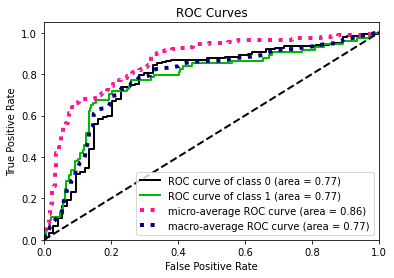

In [119]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test, pred_proba_result);

In [120]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, new_pred_result, target_names=['not churn','churn'], output_dict=True))

,not churn,churn,accuracy,macro avg,weighted avg
precision,0.888372,0.588235,0.803333,0.738304,0.814338
recall,0.845133,0.675676,0.803333,0.760404,0.803333
f1-score,0.866213,0.628931,0.803333,0.747572,0.807684
support,226.000000,74.000000,0.803333,300.000000,300.000000


In [121]:
# create classification old result report
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not fraud','fraud'], output_dict=True))

,not fraud,fraud,accuracy,macro avg,weighted avg
precision,0.808594,0.568182,0.773333,0.688388,0.749292
recall,0.915929,0.337838,0.773333,0.626884,0.773333
f1-score,0.858921,0.423729,0.773333,0.641325,0.751574
support,226.000000,74.000000,0.773333,300.000000,300.000000


KNN

In [122]:
# generate probability prediction
pred_proba_knn_result = knn_clf.predict_proba(X_test)

In [123]:
# check result
pd.DataFrame(pred_proba_knn_result).head(10)

,0,1
0,0.666667,0.333333
1,0.666667,0.333333
2,0.666667,0.333333
3,0.666667,0.333333
4,1.000000,0.000000
5,0.333333,0.666667
6,0.666667,0.333333
7,1.000000,0.000000
8,0.333333,0.666667
9,1.000000,0.000000


In [124]:
# check AUC score
auc_knn = metrics.roc_auc_score(y_test, pred_proba_knn_result[:,1])
auc_knn

0.5806326237742168

In [125]:
# check first 10 prediction of class 1
pred_proba_knn_result[:10,1]

array([0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.        ,
       0.66666667, 0.33333333, 0.        , 0.66666667, 0.        ])

In [126]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds_knn = metrics.roc_curve(y_test, pred_proba_knn_result[:,1])

In [127]:
# calculate g-means
gmeans_knn = np.sqrt(tpr * (1-fpr))

In [128]:
# see gmeans result
gmeans_knn

array([0.        , 0.        , 0.38933093, 0.57793685, 0.        ])

In [129]:
# find the best threshold
ix_knn = np.argmax(gmeans_knn)

In [130]:
print('Best Threshold={}, G-Mean={}'.format(thresholds[ix_knn], gmeans_knn[ix_knn]))

Best Threshold=0.6353315521715792, G-Mean=0.5779368496233781


In [131]:
# change predict proba result to optimized one using new threshold
new_knn_result = (pred_proba_knn_result[:,1] >= thresholds[ix_knn]).astype(int)

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.


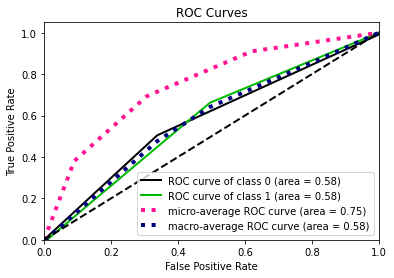

In [132]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test, pred_proba_knn_result);

In [133]:
# check New KNN report result
pd.DataFrame(metrics.classification_report(y_test, new_knn_result, target_names=['not fraud','fraud'], output_dict=True))

,not fraud,fraud,accuracy,macro avg,weighted avg
precision,0.761719,0.295455,0.693333,0.528587,0.646707
recall,0.862832,0.175676,0.693333,0.519254,0.693333
f1-score,0.809129,0.220339,0.693333,0.514734,0.663894
support,226.000000,74.000000,0.693333,300.000000,300.000000


In [134]:
# check old KNN report result
pd.DataFrame(metrics.classification_report(y_test, pred_knn_result, target_names=['not fraud','fraud'], output_dict=True))

,not fraud,fraud,accuracy,macro avg,weighted avg
precision,0.761719,0.295455,0.693333,0.528587,0.646707
recall,0.862832,0.175676,0.693333,0.519254,0.693333
f1-score,0.809129,0.220339,0.693333,0.514734,0.663894
support,226.000000,74.000000,0.693333,300.000000,300.000000


RandomForest

In [135]:
# random forest prediction
rf_pred_proba = random_forest_clf.predict_proba(X_test)

In [136]:
# check result
pd.DataFrame(rf_pred_proba).head(10)

,0,1
0,0.29,0.71
1,0.78,0.22
2,0.87,0.13
3,0.95,0.05
4,0.85,0.15
5,0.92,0.08
6,0.92,0.08
7,0.77,0.23
8,0.49,0.51
9,0.82,0.18


In [137]:
# check AUC score
auc_knn = metrics.roc_auc_score(y_test, rf_pred_proba[:,1])
auc_knn

0.7849198756278403

In [138]:
# check first 10 prediction of class 1
rf_pred_proba[:10,1]

array([0.71, 0.22, 0.13, 0.05, 0.15, 0.08, 0.08, 0.23, 0.51, 0.18])

In [139]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds_knn = metrics.roc_curve(y_test, rf_pred_proba[:,1])

In [140]:
# calculate g-means
gmeans_rf = np.sqrt(tpr * (1-fpr))

In [141]:
# see gmeans result
gmeans_rf

array([0.        , 0.11624764, 0.16403487, 0.20090087, 0.19955703,
       0.22990904, 0.28030291, 0.32292611, 0.32144138, 0.42226369,
       0.42027656, 0.47654882, 0.50232657, 0.53612614, 0.57669397,
       0.59621905, 0.60493071, 0.62323657, 0.63289973, 0.64857764,
       0.64696225, 0.67243182, 0.67074017, 0.69671385, 0.70807858,
       0.70443804, 0.72063414, 0.74426774, 0.76518355, 0.7706342 ,
       0.76658884, 0.76455814, 0.76981906, 0.77288106, 0.77789356,
       0.77577684, 0.77152598, 0.76939174, 0.77419516, 0.76549606,
       0.74330304, 0.72736513, 0.72042667, 0.70397104, 0.70299356,
       0.67831939, 0.67659827, 0.66935697, 0.68328175, 0.64788582,
       0.62653781, 0.59264809, 0.57315785, 0.56315984, 0.52159764,
       0.46202346, 0.42914621, 0.40447154, 0.32806974, 0.30068088,
       0.25412173, 0.14874103, 0.11521431, 0.        ])

In [142]:
# find the best threshold
rx = np.argmax(gmeans_rf)
rx

34

In [143]:
print('Best Threshold={}, G-Mean={}'.format(thresholds[rx], gmeans_rf[rx]))

Best Threshold=0.40417499358669684, G-Mean=0.7778935613109368


In [144]:
# change predict proba result to optimized one using new threshold
new_rf_result = (rf_pred_proba[:,1] >= thresholds[rx]).astype(int)

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.


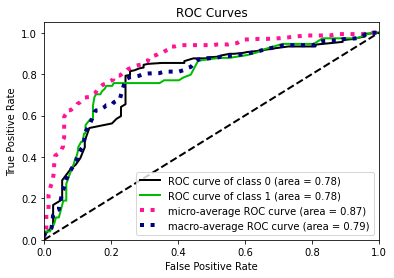

In [145]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test, rf_pred_proba);

In [146]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, new_rf_result, target_names=['not fraud','fraud'], output_dict=True))

,not fraud,fraud,accuracy,macro avg,weighted avg
precision,0.893023,0.600000,0.81,0.746512,0.820744
recall,0.849558,0.689189,0.81,0.769373,0.810000
f1-score,0.870748,0.641509,0.81,0.756129,0.814203
support,226.000000,74.000000,0.81,300.000000,300.000000


In [147]:
# random forest prediction result
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['not fraud','fraud'], output_dict=True))

,not fraud,fraud,accuracy,macro avg,weighted avg
precision,0.831967,0.589286,0.786667,0.710626,0.772106
recall,0.898230,0.445946,0.786667,0.672088,0.786667
f1-score,0.863830,0.507692,0.786667,0.685761,0.775983
support,226.000000,74.000000,0.786667,300.000000,300.000000


XGBoost

In [148]:
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)

In [149]:
# check result
pd.DataFrame(xgb_pred_proba).head(10)

,0,1
0,0.457718,0.542282
1,0.720174,0.279826
2,0.932375,0.067625
3,0.949463,0.050537
4,0.685264,0.314736
5,0.882954,0.117045
6,0.910930,0.089070
7,0.646949,0.353051
8,0.471437,0.528563
9,0.803839,0.196161


Dari hasil perbandingan tiap intrepretasi model;
bahwa model random forest memiliki nilai f1 score terbaik dari ke 3 model diatas dengan nilai f1 score 86%.

# **Model Agnostic Methods**

In [150]:
# Inititate Explainer for all models

## initiate explainer for Random Forest model
data_rf_exp = dx.Explainer(random_forest_clf, X_train, y_train, label = "RF Interpretation")

Preparation of a new explainer is initiated

  -> data              : 700 rows 20 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 700 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RF Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f31d36a1b90> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.253, max = 0.93
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.34, mean = -0.00579, max = 0.43
  -> model_info        : package sklearn

A new explainer has been created!


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


# **Feature Importance**

In [151]:
# visualizr permutation feature importance for Random Forest Model
data_rf_exp.model_parts().plot()

Variable Incident severity memiliki dampak yang berpengaruh terhadap prediksi model dengan nilai drop-out loss 11%. sedangkan variable lain sangat kecil nilai drop-out loss nya.

# **Partial Dependence Plot**

In [152]:
# create partial dependence plot of Random Forest model
data_rf_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 20/20 [00:04<00:00,  4.65it/s]


Variable yang memiliki dampak terhadap prediksi yaitu :
1. Police number, memiliki dampak yang signifika dari 0.2 menjadi 0.4 (ada kenaikan sebesar 50%)
2. Police annual premium, memiliki dampak yang signifikan dari 0.3 turun menjadi 0.2
3. Umberella limit, memiliki dampak yang signifikan karena adanya kenaikan yang secara terus menerus dari 0.2 menjadi 0.9
4. Incident severity, memiliki dampak yang signifikan dengan nilai prediksi 0.5 turun menjadi 0.1
5. vheicel claim, memiliki dampak yang signifikan dari niali 0.2 menjadi 0.340

# **Local Interpretable Model-Agnostic Explanation**

In [188]:
# define Random Forest explainer with lime module
lime_explainer = LimeTabularExplainer(
    X_train.values,
    feature_names = X_train.columns.tolist(),
    class_names = ['churn', 'retained'],
    discretize_continuous = True,
    verbose = True
)

In [174]:
X = X.reset_index()
X

,level_0,index,months_as_customer,policy_number,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,capital-gains,...,incident_severity,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,vehicle_claim
0,0,0,328,521585,1.0,1000,1406.91,0,4.0,53300,...,0.0,1.0,996.0,5,1,1.0,1,2,1.0,52080
1,1,1,228,342868,1.0,2000,1197.22,5000000,4.0,0,...,1.0,5.0,628.0,8,1,0.0,0,0,0.0,3510
2,2,2,134,687698,0.0,2000,1413.14,5000000,6.0,35100,...,1.0,1.0,685.0,7,3,0.0,2,3,0.0,23100
3,3,3,256,227811,1.0,2000,1415.74,6000000,6.0,48900,...,0.0,0.0,669.0,5,1,0.0,1,2,0.0,50720
4,4,4,228,367455,2.0,1000,1583.91,6000000,0.0,66000,...,1.0,0.0,220.0,20,1,0.0,0,1,0.0,4550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,995,3,941851,2.0,1000,1310.80,0,5.0,0,...,1.0,4.0,561.0,20,1,1.0,0,1,0.0,61040
996,996,996,285,186934,0.0,1000,1436.79,0,6.0,70900,...,0.0,3.0,227.0,23,1,1.0,2,3,0.0,72320
997,997,997,130,918516,1.0,500,1383.49,3000000,5.0,35100,...,1.0,0.0,746.0,4,3,0.0,2,3,1.0,52500
998,998,998,458,533940,2.0,2000,1356.92,5000000,0.0,0,...,0.0,0.0,569.0,2,1,0.0,0,1,1.0,36540


In [175]:
# split data to train and test data
# where 30% of churn_data are test data
# stratify data based on y varibales
# and freeze RNG with random_state = 1000
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.3,
    stratify = y, 
    random_state=1000
)

cek index

In [176]:
X_train

,level_0,index,months_as_customer,policy_number,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,capital-gains,...,incident_severity,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,vehicle_claim
757,757,757,173,796005,1.0,1000,1274.63,0,1.0,51000,...,2.0,6.0,985.0,22,1,1.0,2,3,0.0,33110
246,246,246,2,184938,1.0,1000,1340.56,0,3.0,0,...,1.0,3.0,898.0,19,1,1.0,0,2,1.0,45220
304,304,304,286,615047,1.0,500,1386.93,0,2.0,54100,...,1.0,6.0,808.0,15,3,1.0,0,0,0.0,46060
665,665,665,435,593466,2.0,500,1064.49,5000000,0.0,73500,...,2.0,0.0,387.0,23,1,0.0,2,1,0.0,47160
160,160,160,216,454086,2.0,1000,1152.40,0,0.0,39600,...,1.0,6.0,76.0,0,1,1.0,2,3,0.0,3920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,382,382,113,999435,1.0,2000,1091.73,0,6.0,36100,...,1.0,6.0,606.0,15,3,0.0,0,2,1.0,38850
939,939,939,279,598308,1.0,2000,1333.97,6000000,4.0,61100,...,0.0,0.0,672.0,21,3,0.0,1,0,0.0,38850
244,244,244,95,208298,1.0,1000,773.99,0,0.0,0,...,3.0,6.0,592.0,3,1,1.0,1,2,0.0,2240
979,979,979,229,556270,2.0,1000,1331.94,0,5.0,0,...,2.0,1.0,726.0,17,1,0.0,0,2,1.0,34720


In [189]:
index = X_train[X_train['policy_number'] == 235220].index.values
print(index)

[97]


In [199]:
X

,level_0,index,months_as_customer,policy_number,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,capital-gains,...,incident_severity,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,vehicle_claim
0,0,0,328,521585,1.0,1000,1406.91,0,4.0,53300,...,0.0,1.0,996.0,5,1,1.0,1,2,1.0,52080
1,1,1,228,342868,1.0,2000,1197.22,5000000,4.0,0,...,1.0,5.0,628.0,8,1,0.0,0,0,0.0,3510
2,2,2,134,687698,0.0,2000,1413.14,5000000,6.0,35100,...,1.0,1.0,685.0,7,3,0.0,2,3,0.0,23100
3,3,3,256,227811,1.0,2000,1415.74,6000000,6.0,48900,...,0.0,0.0,669.0,5,1,0.0,1,2,0.0,50720
4,4,4,228,367455,2.0,1000,1583.91,6000000,0.0,66000,...,1.0,0.0,220.0,20,1,0.0,0,1,0.0,4550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,995,3,941851,2.0,1000,1310.80,0,5.0,0,...,1.0,4.0,561.0,20,1,1.0,0,1,0.0,61040
996,996,996,285,186934,0.0,1000,1436.79,0,6.0,70900,...,0.0,3.0,227.0,23,1,1.0,2,3,0.0,72320
997,997,997,130,918516,1.0,500,1383.49,3000000,5.0,35100,...,1.0,0.0,746.0,4,3,0.0,2,3,1.0,52500
998,998,998,458,533940,2.0,2000,1356.92,5000000,0.0,0,...,0.0,0.0,569.0,2,1,0.0,0,1,1.0,36540


In [200]:
X = X.drop(['level_0', 'index'], axis = 1)

In [201]:
X

,months_as_customer,policy_number,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,capital-gains,capital-loss,incident_date,incident_severity,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,vehicle_claim
0,328,521585,1.0,1000,1406.91,0,4.0,53300,0,17.0,0.0,1.0,996.0,5,1,1.0,1,2,1.0,52080
1,228,342868,1.0,2000,1197.22,5000000,4.0,0,0,13.0,1.0,5.0,628.0,8,1,0.0,0,0,0.0,3510
2,134,687698,0.0,2000,1413.14,5000000,6.0,35100,0,45.0,1.0,1.0,685.0,7,3,0.0,2,3,0.0,23100
3,256,227811,1.0,2000,1415.74,6000000,6.0,48900,-62400,1.0,0.0,0.0,669.0,5,1,0.0,1,2,0.0,50720
4,228,367455,2.0,1000,1583.91,6000000,0.0,66000,-46000,39.0,1.0,0.0,220.0,20,1,0.0,0,1,0.0,4550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,941851,2.0,1000,1310.80,0,5.0,0,0,45.0,1.0,4.0,561.0,20,1,1.0,0,1,0.0,61040
996,285,186934,0.0,1000,1436.79,0,6.0,70900,0,16.0,0.0,3.0,227.0,23,1,1.0,2,3,0.0,72320
997,130,918516,1.0,500,1383.49,3000000,5.0,35100,0,15.0,1.0,0.0,746.0,4,3,0.0,2,3,1.0,52500
998,458,533940,2.0,2000,1356.92,5000000,0.0,0,0,49.0,0.0,0.0,569.0,2,1,0.0,0,1,1.0,36540


In [202]:
policy_number_235220 = X.loc[X["policy_number"] == 235220]
policy_number_235220

,months_as_customer,policy_number,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,capital-gains,capital-loss,incident_date,incident_severity,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,vehicle_claim
97,29,235220,1.0,2000,1352.83,0,5.0,0,-71700,14.0,1.0,2.0,75.0,4,4,1.0,1,2,1.0,50470


In [203]:
policy_number_235220 = X.iloc[97]
policy_number_235220

months_as_customer                 29.00
policy_number                  235220.00
policy_csl                          1.00
policy_deductable                2000.00
policy_annual_premium            1352.83
umbrella_limit                      0.00
insured_education_level             5.00
capital-gains                       0.00
capital-loss                   -71700.00
incident_date                      14.00
incident_severity                   1.00
incident_city                       2.00
incident_location                  75.00
incident_hour_of_the_day            4.00
number_of_vehicles_involved         4.00
property_damage                     1.00
bodily_injuries                     1.00
witnesses                           2.00
police_report_available             1.00
vehicle_claim                   50470.00
Name: 97, dtype: float64

In [ ]:
#X_train.head()

In [ ]:
#policy_number_527945 = X_train.loc[X["policy_number"] == 527945]
#policy_number_527945

In [ ]:
#No_Police_605100 = X.loc[X["policy_number"] == 605100]
#No_Police_605100

In [ ]:
#Police_605100 = X_train.iloc[97]
#Police_605100

In [ ]:
# explain Random Forest prediction for user_id: 23976
exp = lime_explainer.explain_instance(policy_number_235220, rf.predict_proba, num_features=5)
 
exp.show_in_notebook(show_table=True)
#lime_explainer.explain_instance(policy_number_235220, random_forest_clf.predict_proba).show_in_notebook(show_table=True)